#### Analyzing Neural Time Series Data
Python code for Chapter 13 -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.io import loadmat
from scipy.signal import hilbert
from scipy.fftpack import fft, ifft
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import Axes3D

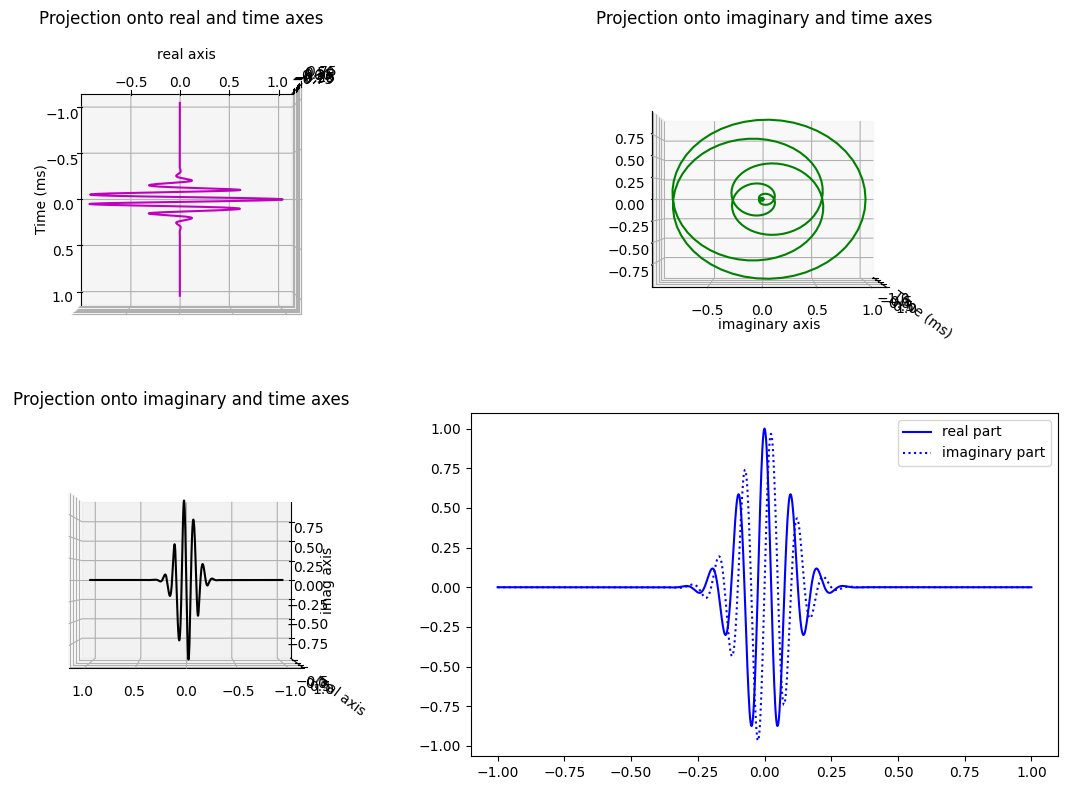

In [2]:
# Figure 13.1

# Parameters
srate = 500  # Sampling rate in Hz
f = 10  # Frequency of wavelet in Hz
time = np.arange(-1, 1 + 1/srate, 1/srate)  # Time, from -1 to 1 second in steps of 1/sampling-rate
s = 6 / (2 * np.pi * f)

# Create a wavelet
wavelet = np.exp(2 * np.pi * 1j * f * time) * np.exp(-time**2 / (2 * s**2))

# Plotting
fig = plt.figure(figsize=(12, 8))

# Show the projection onto the real axis
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot3D(time, np.real(wavelet), np.imag(wavelet), 'm')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('real axis')
ax1.view_init(90, 0)
ax1.set_title('Projection onto real and time axes')

# Show the projection onto the imaginary axis
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot3D(time, np.real(wavelet), np.imag(wavelet), 'g')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('imaginary axis')
ax2.view_init(0, 0)
ax2.set_title('Projection onto imaginary and time axes')

# Plot projection onto real and imaginary axes
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot3D(time, np.real(wavelet), np.imag(wavelet), 'k')
ax3.set_ylabel('real axis')
ax3.set_zlabel('imag axis')
ax3.view_init(0, 90)
ax3.set_title('Projection onto imaginary and time axes')

# Plot real and imaginary projections simultaneously
ax4 = fig.add_subplot(224)
ax4.plot(time, np.real(wavelet), 'b')
ax4.plot(time, np.imag(wavelet), 'b:')
ax4.legend(['real part', 'imaginary part'])

plt.tight_layout()
plt.show()

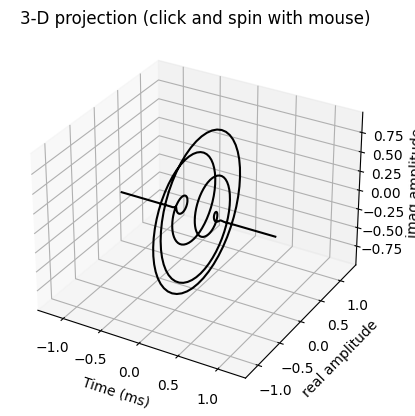

In [3]:
# Figure 13.2

# Now show in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(time, np.real(wavelet), np.imag(wavelet), 'k')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('real amplitude')
ax.set_zlabel('imag amplitude')
ax.set_title('3-D projection (click and spin with mouse)')
ax.axis('equal')
plt.show()

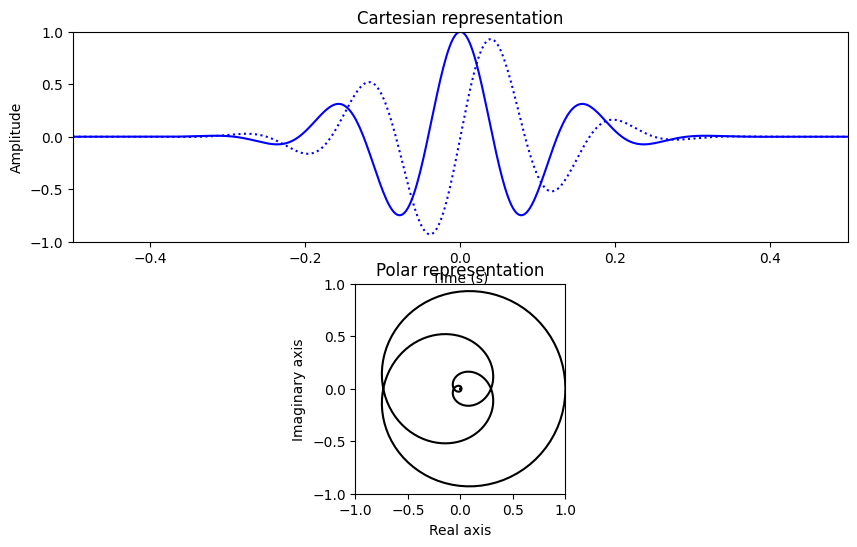

In [8]:
# Movie

# Parameters for the movie
frequency = 6  # Frequency of the sine wave
srate = 500  # Note: should be the same as the data
time = np.arange(-0.5, 0.5 + 1/srate, 1/srate)  # Vector of time

# Make wavelet
wavelet = np.exp(2 * 1j * np.pi * frequency * time) * np.exp(-time**2 / (2 * (4 / (2 * np.pi * frequency))**2))

# Make a movie to compare cartesian and polar representation of wavelet
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Setup top row of data (real and imaginary in cartesian plot)
cplotR, = axs[0].plot(time[0], np.real(wavelet[0]), 'b')
cplotI, = axs[0].plot(time[0], np.imag(wavelet[0]), 'b:')
axs[0].set_ylim([-1, 1])
axs[0].set_xlim([time[0], time[-1]])
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Cartesian representation')

# Setup bottom row of data (polar representation)
pplot, = axs[1].plot(np.real(wavelet[0]), np.imag(wavelet[0]), 'k')
axs[1].set_ylim([-1, 1])
axs[1].set_xlim([-1, 1])
axs[1].set_title('Polar representation')
axs[1].set_xlabel('Real axis')
axs[1].set_ylabel('Imaginary axis')
axs[1].axis('square')

# Animation function
def update(ti):
    cplotR.set_data(time[:ti+1], np.real(wavelet[:ti+1]))
    cplotI.set_data(time[:ti+1], np.imag(wavelet[:ti+1]))
    pplot.set_data(np.real(wavelet[:ti+1]), np.imag(wavelet[:ti+1]))
    axs[1].set_ylim([-1, 1])
    axs[1].set_xlim([-1, 1])
    return cplotR, cplotI, pplot

# Create animation
timeskip = 5  # If you have a slow computer, set this to a higher number
ani = FuncAnimation(fig, update, frames=range(0, len(time), timeskip), blit=True)

# Display the animation
HTML(ani.to_html5_video())

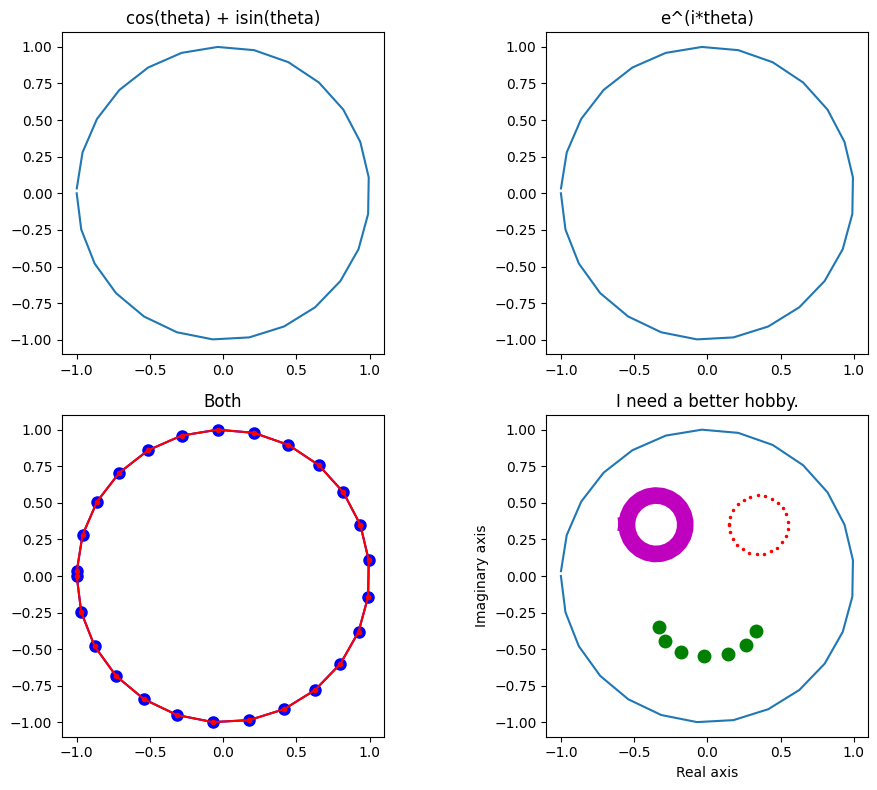

In [10]:
# Figure 13.4

# Euler's formula: exp(1i*k) gives you a vector on a unit circle with angle k
time = np.arange(-np.pi, np.pi, 0.25)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# cos(theta) + isin(theta)
axs[0, 0].plot(np.cos(time), np.sin(time))
axs[0, 0].axis('square')
axs[0, 0].set_title('cos(theta) + isin(theta)')

# e^(i*theta)
axs[0, 1].plot(np.exp(1j * time).real, np.exp(1j * time).imag)
axs[0, 1].axis('square')
axs[0, 1].set_title('e^(i*theta)')

# Both
axs[1, 0].plot(np.cos(time), np.sin(time), 'bo-', markersize=8)
axs[1, 0].plot(np.exp(1j * time).real, np.exp(1j * time).imag, 'r.-')
axs[1, 0].axis('square')
axs[1, 0].set_title('Both')

# I need a better hobby
axs[1, 1].plot(np.cos(time), np.sin(time))
axs[1, 1].plot(-.35 + np.cos(time) / 5, .35 + np.sin(time) / 5, 'm', linewidth=12)  # Left eye
axs[1, 1].plot(.35 + np.cos(time) / 5, .35 + np.sin(time) / 5, 'r.', markersize=3)  # Right eye
smile = np.arange(-np.pi, 0, 0.5)
axs[1, 1].plot(np.cos(smile) / 3, -.35 + np.sin(smile) / 5, 'go', markersize=9)  # Mouth
axs[1, 1].set_xlabel('Real axis')
axs[1, 1].set_ylabel('Imaginary axis')
axs[1, 1].axis('square')
axs[1, 1].set_title('I need a better hobby.')

plt.tight_layout()
plt.show()

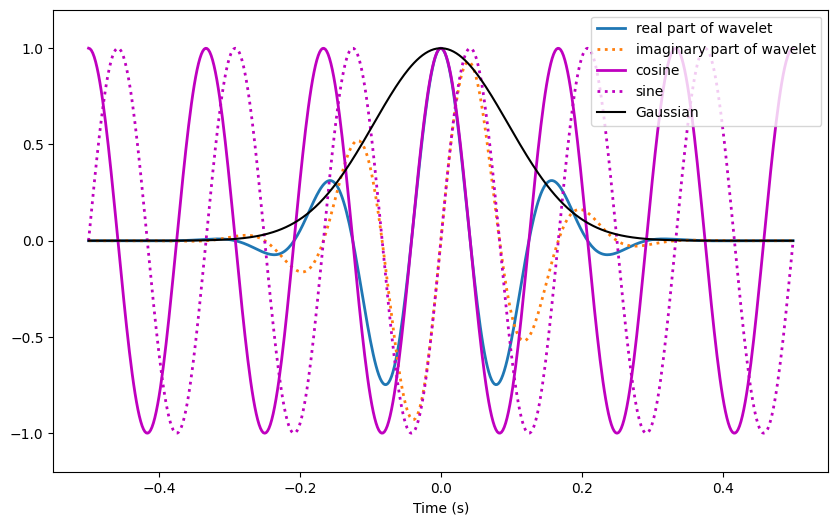

In [11]:
# Figure 13.5

# Redefine time
time = np.arange(-0.5, 0.5 + 1/srate, 1/srate)  # Vector of time

# Plotting
plt.figure(figsize=(10, 6))

# Plot real and imaginary parts of wavelet
plt.plot(time, np.real(wavelet), linewidth=2)
plt.plot(time, np.imag(wavelet), ':', linewidth=2)

# Plot cosine and sine
plt.plot(time, np.cos(2 * np.pi * frequency * time), 'm', linewidth=2)
plt.plot(time, np.sin(2 * np.pi * frequency * time), 'm:', linewidth=2)

# Plot gaussian window
gaus_win = np.exp(-time**2 / (2 * s**2))
plt.plot(time, gaus_win, 'k')
plt.ylim([-1.2, 1.2])
plt.xlabel('Time (s)')
plt.legend(['real part of wavelet', 'imaginary part of wavelet', 'cosine', 'sine', 'Gaussian'])
plt.show()

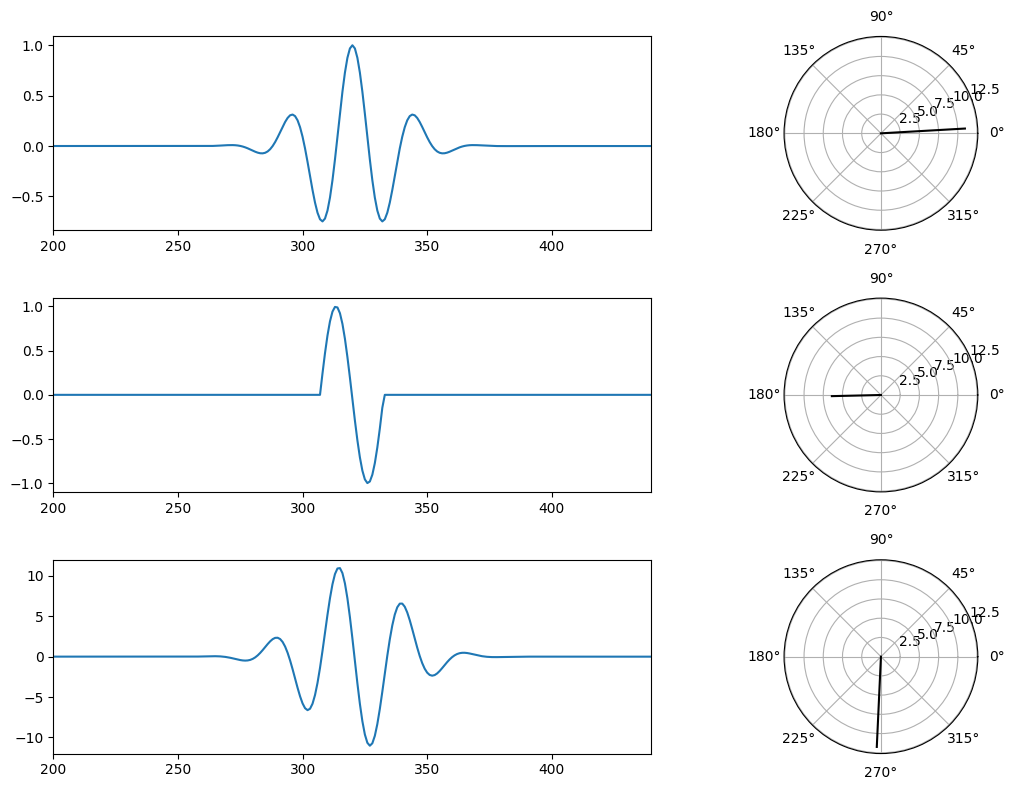

In [42]:
# Figure 13.6

# Load sample EEG data
EEG = loadmat('../data/sampleEEGdata.mat')['EEG'][0,0]

# Create 10 Hz wavelet (kernel)
time = np.arange(-(EEG['pnts'][0, 0]/EEG['srate'][0, 0]/2), EEG['pnts'][0, 0]/EEG['srate'][0, 0]/2, 1/EEG['srate'][0, 0])
f = 10  # Frequency of sine wave in Hz
s = 4 / (2 * np.pi * f)
wavelet = np.exp(1j * 2 * np.pi * f * time) * np.exp(-time**2 / (2 * s**2))

# Signal is one sine cycle
timeS = np.arange(0, 1/f, 1/EEG['srate'][0, 0])  # One cycle is 1/f
signal = np.sin(2 * np.pi * f * timeS)

# Now zero-pad signal
signal = np.concatenate((np.zeros(int(EEG['pnts'][0, 0]/2 - len(timeS)/2)), signal, np.zeros(int(EEG['pnts'][0, 0]/2 - len(timeS)/2))))

# Plotting
fig = plt.figure(figsize=(12, 8))

# Plot waves
ax1 = fig.add_subplot(321)
ax1.plot(np.real(wavelet))
ax1.set_xlim([200, len(time) - 200])

ax2 = fig.add_subplot(323)
ax2.plot(signal)
ax2.set_xlim([200, len(time) - 200])

ax3 = fig.add_subplot(325)
ax3.plot(np.real(np.convolve(wavelet, signal, 'same')))
ax3.set_xlim([200, len(time) - 200])
ax3.set_ylim([-12, 12])

# Now plot dot products at selected phase lags
ax4 = fig.add_subplot(322, projection='polar')
ax4.plot(0, 12, 'k')
dp = np.sum(wavelet[int(round(100/f))-3:] * signal[:-int(round(100/f))+3])
ax4.plot([np.angle(dp), np.angle(dp)], [0, np.abs(dp)], 'k')

ax5 = fig.add_subplot(324, projection='polar')
ax5.plot(0, 12, 'k')
dp = np.sum(wavelet[int(round(2.3*(100/f))-3):] * signal[:-int(round(2.3*(100/f))-3)])
ax5.plot([np.angle(dp), np.angle(dp)], [0, np.abs(dp)], 'k')

ax6 = fig.add_subplot(326, projection='polar')
ax6.plot(0, 12, 'k')
dp = np.sum(wavelet * signal)
ax6.plot([np.angle(dp), np.angle(dp)], [0, np.abs(dp)], 'k')

plt.tight_layout()
plt.show()

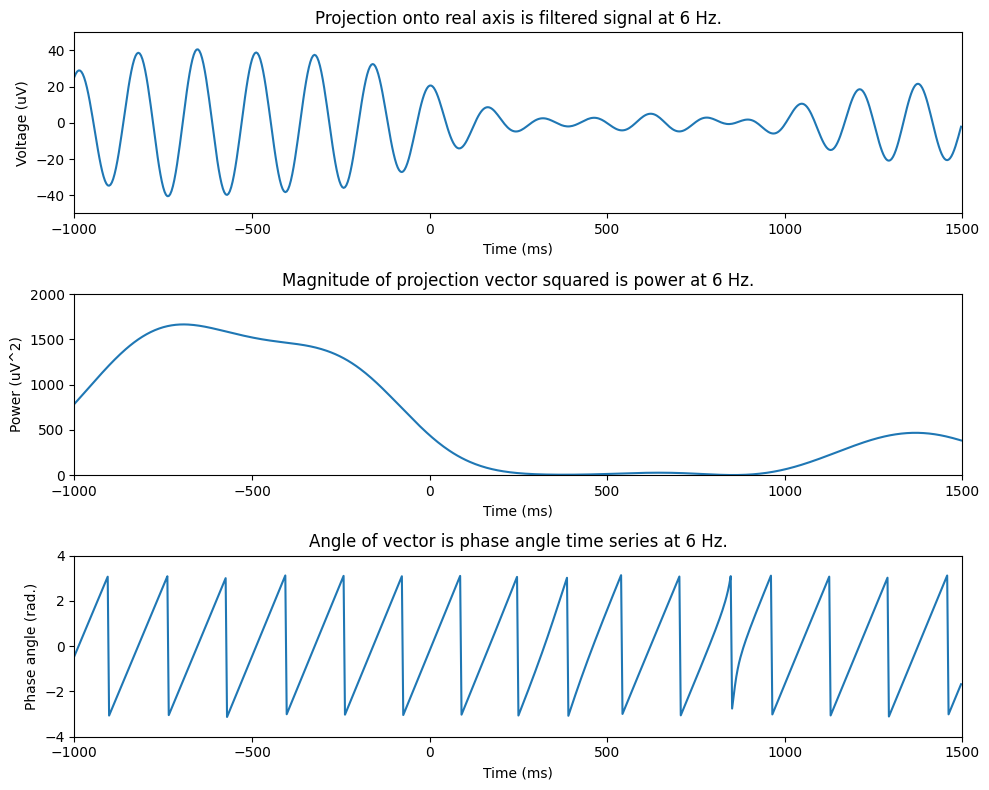

In [39]:
# Figure 13.8

# Create wavelet
frequency = 6  # in Hz, as usual
time = np.arange(-1, 1 + 1/EEG['srate'][0, 0], 1/EEG['srate'][0, 0])
s = (4 / (2 * np.pi * frequency))**2  # Note that s is squared here rather than in the next line...
wavelet = np.exp(2 * 1j * np.pi * frequency * time) * np.exp(-time**2 / (2 * s) / frequency)

# FFT parameters
n_wavelet = len(wavelet)
n_data = EEG['pnts'][0, 0]
n_convolution = n_wavelet + n_data - 1
half_of_wavelet_size = (len(wavelet) - 1) // 2

# FFT of wavelet and EEG data
fft_wavelet = fft(wavelet, n_convolution)
fft_data = fft(EEG['data'][46, :, 0], n_convolution)  # FCz, trial 1

convolution_result_fft = ifft(fft_wavelet * fft_data, n_convolution) * np.sqrt(s)

# Cut off edges
convolution_result_fft = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size]

# Plot for comparison
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(EEG['times'][0], np.real(convolution_result_fft))
axs[0].set_xlim([-1000, 1500])
axs[0].set_ylim([-50, 50])
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Voltage (uV)')
axs[0].set_title(f'Projection onto real axis is filtered signal at {frequency} Hz.')

axs[1].plot(EEG['times'][0], np.abs(convolution_result_fft)**2)
axs[1].set_xlim([-1000, 1500])
axs[1].set_ylim([0, 2000])
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Power (uV^2)')
axs[1].set_title(f'Magnitude of projection vector squared is power at {frequency} Hz.')

axs[2].plot(EEG['times'][0], np.angle(convolution_result_fft))
axs[2].set_xlim([-1000, 1500])
axs[2].set_ylim([-4, 4])
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Phase angle (rad.)')
axs[2].set_title(f'Angle of vector is phase angle time series at {frequency} Hz.')

plt.tight_layout()
plt.show()

In [33]:
EEG['times'][0].shape

(640,)

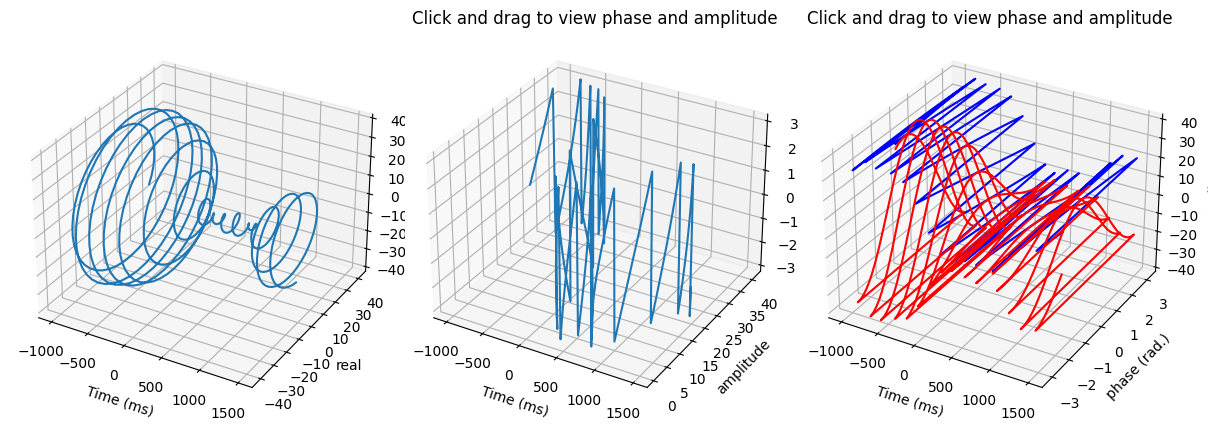

In [43]:
# Figure 13.9

# Plotting 3D representations of the convolution result
fig = plt.figure(figsize=(12, 8))

# Real vs. Imaginary
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot3D(EEG['times'][0], np.real(convolution_result_fft), np.imag(convolution_result_fft))
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('real')
ax1.set_zlabel('imaginary')
ax1.grid(True)

# Amplitude vs. Phase
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot3D(EEG['times'][0], np.abs(convolution_result_fft), np.angle(convolution_result_fft))
ax2.set_title('Click and drag to view phase and amplitude')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('amplitude')
ax2.set_zlabel('phase (rad.)')

# Phase vs. Amplitude
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot3D(EEG['times'][0], np.angle(convolution_result_fft), np.abs(convolution_result_fft), 'b')
ax3.plot3D(EEG['times'][0], np.angle(convolution_result_fft), np.real(convolution_result_fft), 'r')
ax3.set_title('Click and drag to view phase and amplitude')
ax3.set_xlabel('Time (ms)')
ax3.set_zlabel('amplitude')
ax3.set_ylabel('phase (rad.)')

plt.tight_layout()
plt.show()

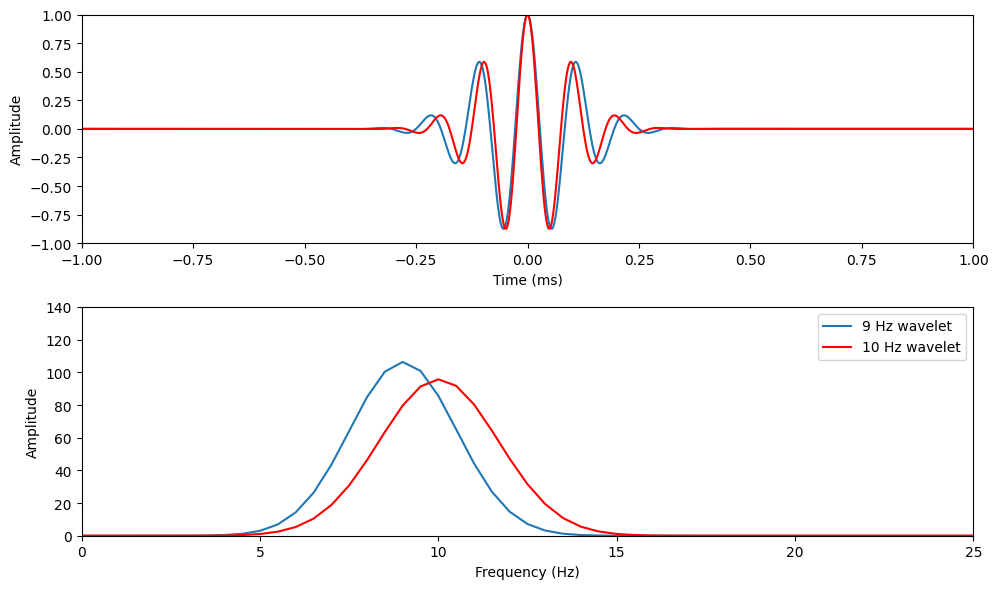

In [51]:
# Figure 13.10
srate = 400
time = np.arange(-1,1 + 1/srate, 1/srate)

# Create a 9 Hz wavelet
f = 9  # Frequency of wavelet in Hz
s = 6 / (2 * np.pi * f)
wavelet9 = np.exp(2 * np.pi * 1j * f * time) * np.exp(-time**2 / (2 * s**2))

# Create a 10 Hz wavelet
f = 10  # Frequency of wavelet in Hz
s = 6 / (2 * np.pi * f)
wavelet10 = np.exp(2 * np.pi * 1j * f * time) * np.exp(-time**2 / (2 * s**2))

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(time, np.real(wavelet9))
axs[0].plot(time, np.real(wavelet10), 'r')
axs[0].set_xlim([-1, 1])
axs[0].set_ylim([-1, 1])
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Amplitude')

# Frequency domain representation
hz = np.linspace(0, srate/2, int(np.floor(len(time)/2)) + 1)
fft9 = fft(wavelet9)
fft10 = fft(wavelet10)

axs[1].plot(hz, np.abs(fft9[:len(hz)]))
axs[1].plot(hz, np.abs(fft10[:len(hz)]), 'r')
axs[1].set_xlim([0, 25])
axs[1].set_ylim([0, 140])
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Amplitude')
axs[1].legend(['9 Hz wavelet', '10 Hz wavelet'])

plt.tight_layout()
plt.show()

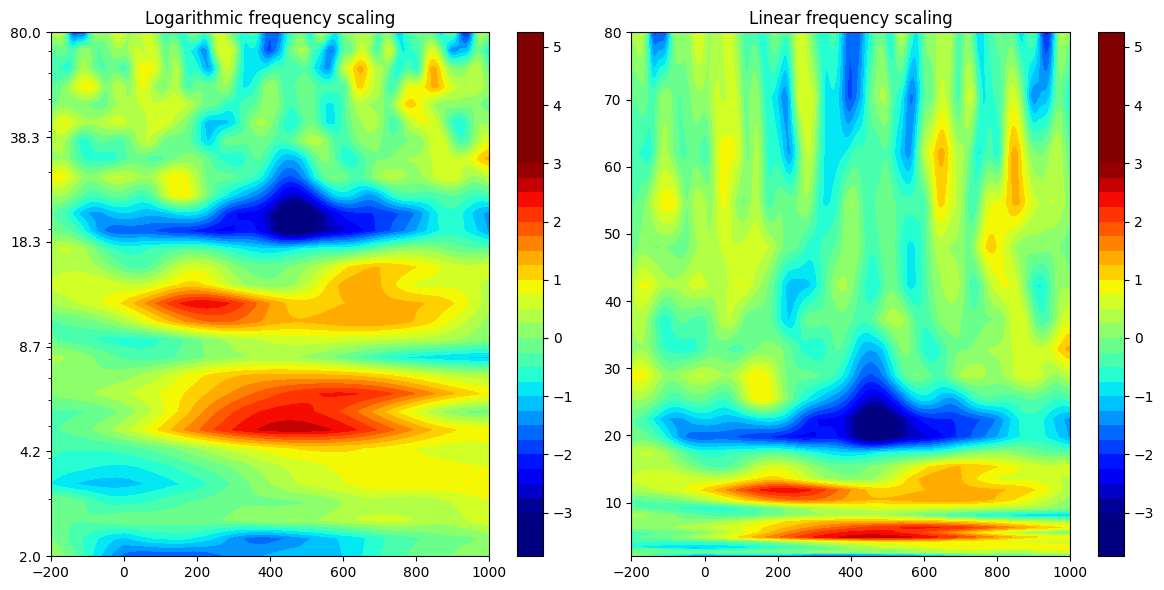

In [99]:
# Figure 13.11

# Definitions, selections...
chan2use = 'FCz'

min_freq = 2
max_freq = 80
num_frex = 30

# Define wavelet parameters
time = np.arange(-1, 1 + 1/EEG['srate'][0, 0], 1/EEG['srate'][0, 0])
frex = np.logspace(np.log10(min_freq), np.log10(max_freq), num_frex)
s = np.logspace(np.log10(3), np.log10(10), num_frex) / (2 * np.pi * frex)

# use the following lines to reproduce figure 13.14
# s = 3./(2*np.pi*frex)
# s = 10./(2*np.pi*frex)

# Define convolution parameters
n_wavelet = len(time)
n_data = EEG['pnts'][0, 0] * EEG['trials'][0, 0]
n_convolution = n_wavelet + n_data - 1
n_conv_pow2 = 2**np.ceil(np.log2(n_convolution)).astype('int')
half_of_wavelet_size = (n_wavelet - 1) // 2

# Find the index of the channel to use
chanidx = EEG["chanlocs"][0]["labels"] == chan2use

# Reshape the data for the channel of interest
eegdata_chan = np.reshape(EEG['data'][chanidx, :, :], (EEG['pnts'][0, 0] * EEG['trials'][0, 0]), order="F")

# Perform the FFT
eegfft = fft(eegdata_chan, n_conv_pow2)

# Initialize
eegpower = np.zeros((num_frex, EEG['pnts'][0, 0]))  # Frequencies X Time X Trials

# Baseline indices
baseidx = np.array([np.argmin(np.abs(EEG['times'][0] + 500)), np.argmin(np.abs(EEG['times'][0] + 200))])

# Loop through frequencies and compute synchronization
for fi in range(num_frex):
    wavelet = fft(np.sqrt(1 / (s[fi] * np.sqrt(np.pi))) * np.exp(2 * 1j * np.pi * frex[fi] * time) * np.exp(-time**2 / (2 * (s[fi]**2))), n_conv_pow2)
    
    # Convolution
    eegconv = ifft(wavelet * eegfft, n_conv_pow2)
    eegconv = eegconv[:n_convolution]
    eegconv = eegconv[half_of_wavelet_size:-half_of_wavelet_size]
    
    # Average power over trials (this code performs baseline transform, which you will learn about in chapter 18)
    temppower = np.mean(np.abs(np.reshape(eegconv, (EEG['pnts'][0, 0], EEG['trials'][0, 0]), order="F"))**2, axis=1)
    eegpower[fi, :] = 10 * np.log10(temppower / np.mean(temppower[baseidx[0]:baseidx[1]]))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Logarithmic frequency scaling
cf1 = axs[0].contourf(EEG['times'][0], frex, eegpower, 40, cmap='jet', vmin=-3, vmax=3)
axs[0].set_yscale('log')
axs[0].set_yticks(np.logspace(np.log10(min_freq), np.log10(max_freq), 6))
axs[0].set_yticklabels(np.round(np.logspace(np.log10(min_freq), np.log10(max_freq), 6), 1))
axs[0].set_xlim([-200, 1000])
axs[0].set_title('Logarithmic frequency scaling')

# Linear frequency scaling
cf2 = axs[1].contourf(EEG['times'][0], frex, eegpower, 40, cmap='jet', vmin=-3, vmax=3)
axs[1].set_xlim([-200, 1000])
axs[1].set_title('Linear frequency scaling')

plt.colorbar(cf1, ax=axs[0])
plt.colorbar(cf2, ax=axs[1])
plt.tight_layout()
plt.show()

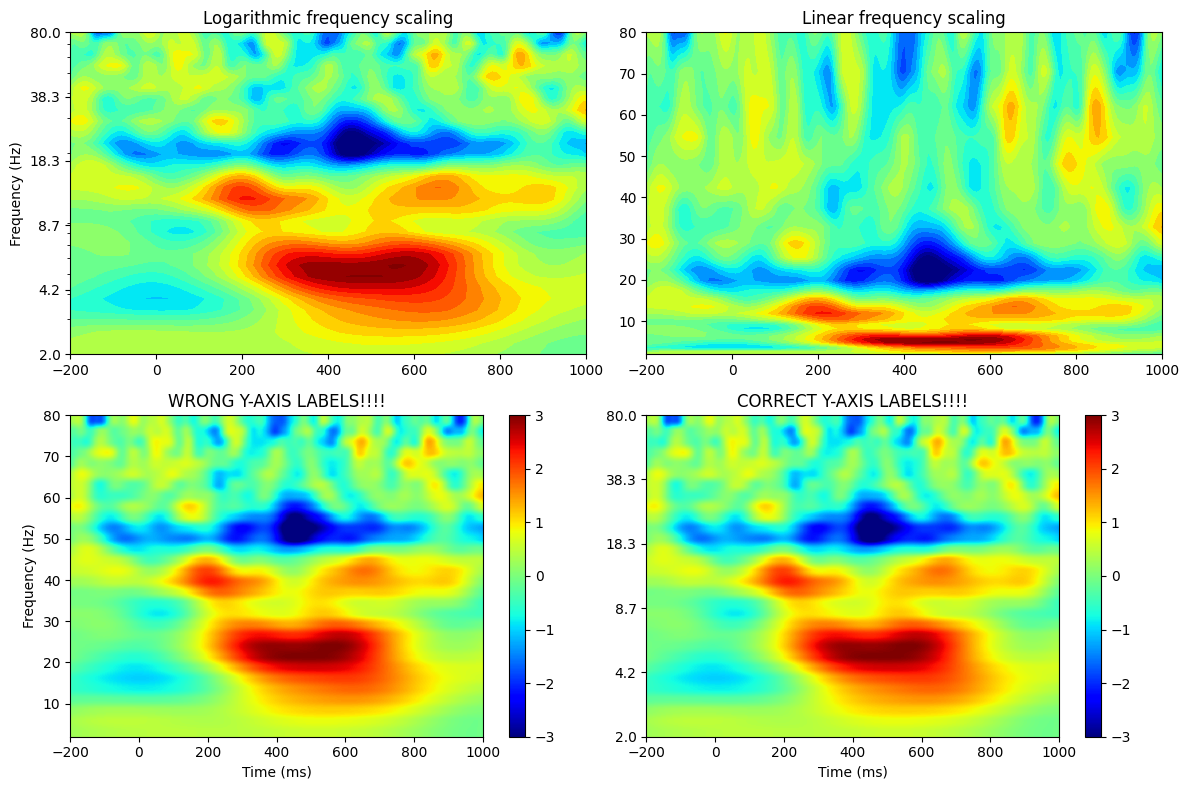

In [88]:
# IMPORTANT TANGENT HERE ON Y-AXIS SCALING USING IMAGESC!!!

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Logarithmic frequency scaling
cf1 = axs[0, 0].contourf(EEG['times'][0], frex, eegpower, 40, cmap='jet', vmin=-3, vmax=3)
axs[0, 0].set_yscale('log')
axs[0, 0].set_yticks(np.logspace(np.log10(min_freq), np.log10(max_freq), 6))
axs[0, 0].set_yticklabels(np.round(np.logspace(np.log10(min_freq), np.log10(max_freq), 6), 1))
axs[0, 0].set_xlim([-200, 1000])
axs[0, 0].set_title('Logarithmic frequency scaling')
axs[0, 0].set_ylabel('Frequency (Hz)')

# Linear frequency scaling
cf2 = axs[0, 1].contourf(EEG['times'][0], frex, eegpower, 40, cmap='jet', vmin=-3, vmax=3)
axs[0, 1].set_xlim([-200, 1000])
axs[0, 1].set_title('Linear frequency scaling')

# WRONG Y-AXIS LABELS!!!!
im1 = axs[1, 0].imshow(eegpower, aspect='auto', extent=[EEG['times'][0][0], EEG['times'][0][-1], frex[0], frex[-1]], cmap='jet', origin = "lower", vmin=-3, vmax=3)
axs[1, 0].set_xlim([-200, 1000])
axs[1, 0].set_title('WRONG Y-AXIS LABELS!!!!')
axs[1, 0].set_ylabel('Frequency (Hz)')
axs[1, 0].set_xlabel('Time (ms)')

# CORRECT Y-AXIS LABELS!!!!
im2 = axs[1, 1].imshow(eegpower, aspect='auto', extent=[EEG['times'][0][0], EEG['times'][0][-1], 0, len(frex)], cmap='jet', origin = "lower", vmin=-3, vmax=3)
axs[1, 1].set_xlim([-200, 1000])
axs[1, 1].set_yticks(np.linspace(0, len(frex), 6))
axs[1, 1].set_yticklabels(np.round(np.logspace(np.log10(min_freq), np.log10(max_freq), 6), 1))
axs[1, 1].set_title('CORRECT Y-AXIS LABELS!!!!')
axs[1, 1].set_xlabel('Time (ms)')

plt.colorbar(im1, ax=axs[1, 0])
plt.colorbar(im2, ax=axs[1, 1])
plt.tight_layout()
plt.show()

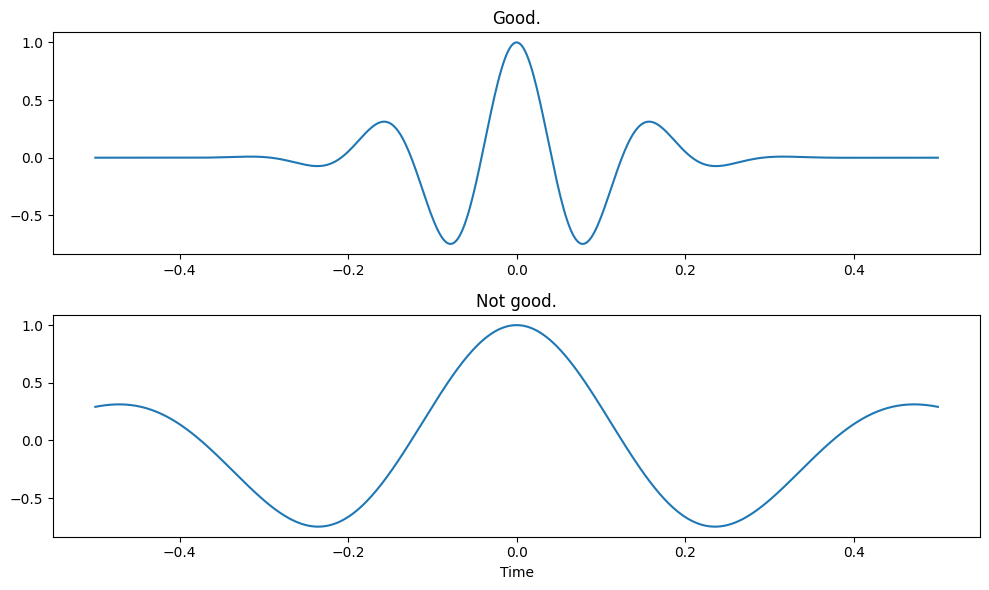

In [89]:
# Figure 13.12

# Parameters for the wavelet
frequency = 6  # Frequency of the sine wave
srate = 500  # Note: should be the same as the data
time = np.arange(-0.5, 0.5 + 1/srate, 1/srate)  # Vector of time

# Make wavelet
wavelet = np.exp(2 * 1j * np.pi * frequency * time) * np.exp(-time**2 / (2 * (4 / (2 * np.pi * frequency))**2))

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Good wavelet
axs[0].plot(time, np.real(wavelet))
axs[0].set_title('Good.')

# Now make a wavelet that is too short
tooLowFrequency = 2
wavelet = np.exp(2 * 1j * np.pi * tooLowFrequency * time) * np.exp(-time**2 / (2 * (4 / (2 * np.pi * tooLowFrequency))**2))

# Not good wavelet
axs[1].plot(time, np.real(wavelet))
axs[1].set_xlabel('Time')
axs[1].set_title('Not good.')

plt.tight_layout()
plt.show()

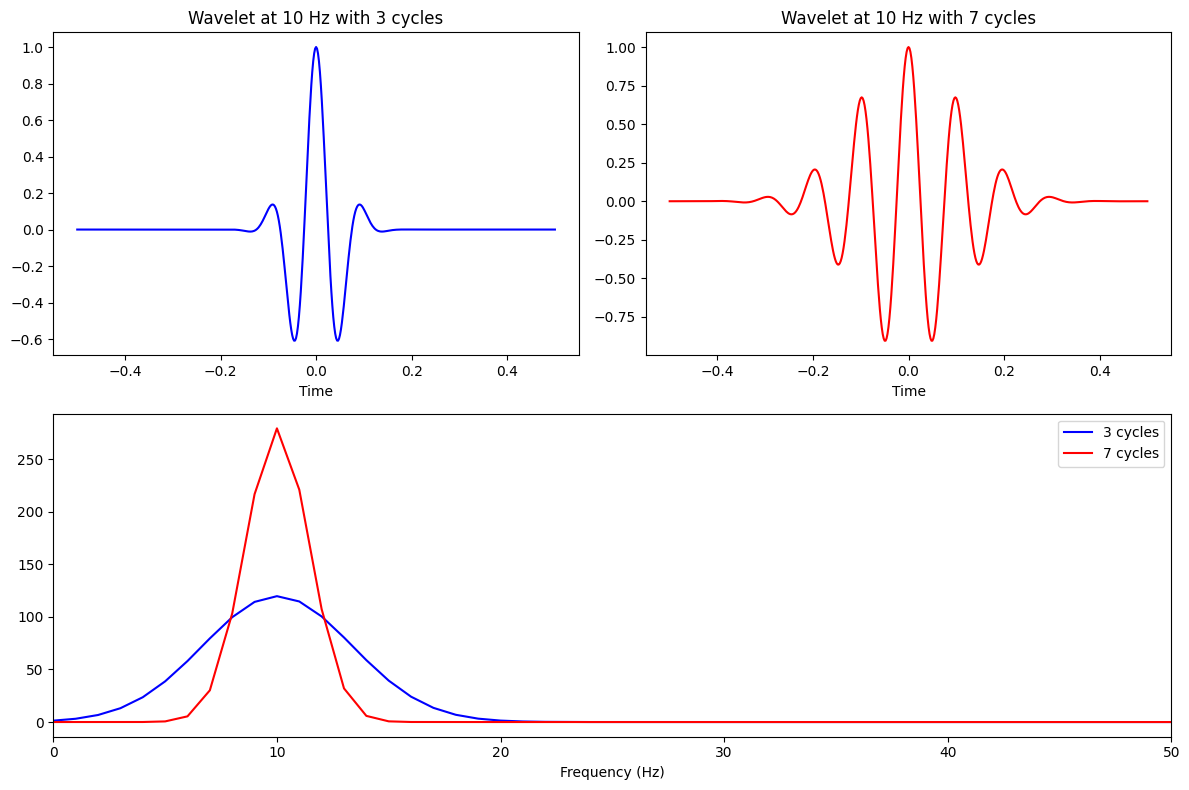

In [94]:
# Figure 13.13

frequency = 10
time = np.arange(-0.5, 0.5 + 1/srate, 1/srate)
numcycles = [3, 7]

wavecolors = ['b', 'r']

# Plotting
fig = plt.figure(figsize=(12, 8))

for i, nc in enumerate(numcycles):
    # Make wavelet
    wavelet = np.exp(2 * 1j * np.pi * frequency * time) * np.exp(-time**2 / (2 * (nc / (2 * np.pi * frequency))**2))
    
    # Time domain representation
    plt.subplot(2,2,i+1)
    plt.plot(time, np.real(wavelet), wavecolors[i])
    plt.xlabel('Time')
    plt.title(f'Wavelet at {frequency} Hz with {nc} cycles')
    
    # Frequency domain representation
    plt.subplot(2,1,2)
    fft_wav = 2 * np.abs(fft(wavelet))
    hz_wav = np.linspace(0, srate/2, int(np.round(len(wavelet)/2)) + 1)
    plt.plot(hz_wav, fft_wav[:len(hz_wav)], wavecolors[i])

plt.subplot(212)
plt.xlabel('Frequency (Hz)')
plt.xlim([0, 50])
plt.legend([f'{numcycles[0]} cycles', f'{numcycles[1]} cycles'])

plt.tight_layout()
plt.show()

In [ ]:
# Figure 13.14

# To generate this figure, go up to the code for figure 13.11 and uncomment
# the lines that define the width of the Gaussians for the Morlet wavelets:
# s = 3./(2*np.pi*frex);
# s = 10./(2*np.pi*frex);
# Then, re-run the code for figure 13.11.

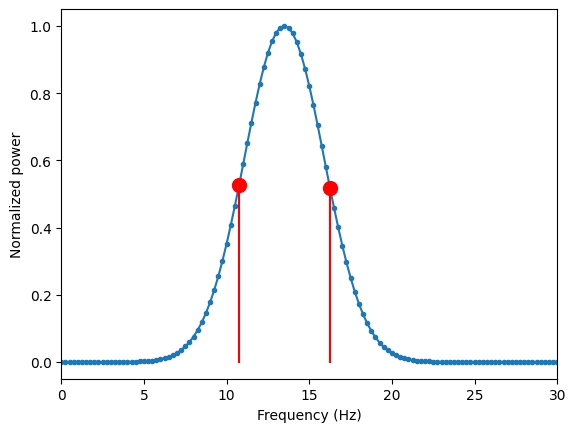

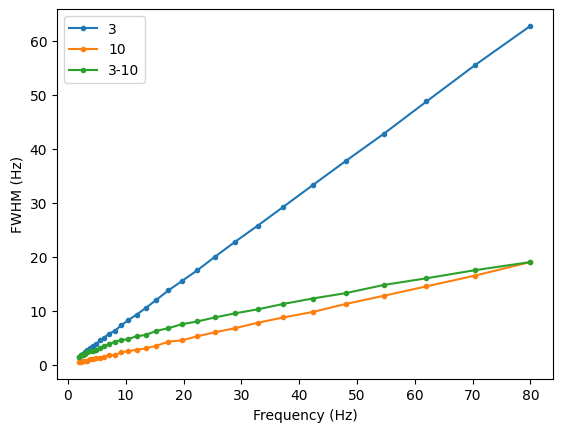

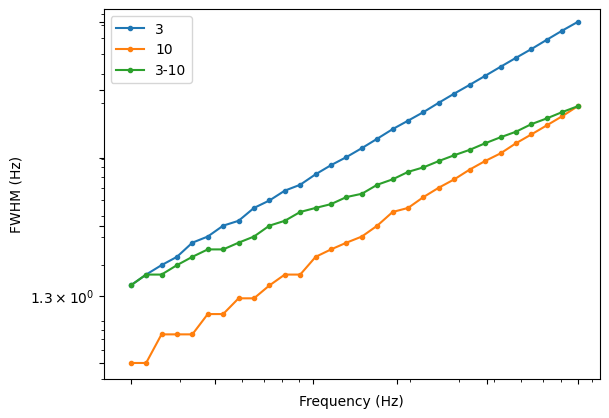

In [100]:
# Figure 13.15

frex = np.logspace(np.log10(2), np.log10(80), 30)
srate = 500
time = np.arange(-2, 2 + 1/srate, 1/srate)
N = len(time)
hz = np.linspace(0, srate/2, int(np.floor(N/2)) + 1)
fwhm = np.zeros((3, len(frex)))

for numcyclesi in range(1, 4):
    if numcyclesi == 1:
        numcycles = np.repeat(3, len(frex))
    elif numcyclesi == 2:
        numcycles = np.repeat(10, len(frex))
    else:
        numcycles = np.logspace(np.log10(3), np.log10(10), len(frex))
    
    for fi in range(len(frex)):
        # Make wavelet
        wavelet = np.exp(2 * 1j * np.pi * frex[fi] * time) * np.exp(-time**2 / (2 * (numcycles[fi] / (2 * np.pi * frex[fi]))**2))
        
        # Take FFT of wavelet
        fwave = fft(wavelet)
        fwave = np.abs(fwave[:len(hz)]) * 2
        
        # Normalize power to [0 1]
        fwave = (fwave - np.min(fwave)) / np.max(fwave)
        
        # Find left and right 1/2
        peakx = np.argmax(fwave)
        left5 = np.argmin(np.abs(fwave[:peakx] - 0.5))
        right5 = peakx + np.argmin(np.abs(fwave[peakx:] - 0.5))
        
        fwhm[numcyclesi-1, fi] = hz[right5] - hz[left5]
        
        # Plot one example of a wavelet's power spectrum and fwhm
        if fi == int(np.ceil(len(frex)/2)) and numcyclesi == 3:
            plt.figure()
            
            # Plot power spectrum
            plt.plot(hz, fwave, '.-')
            
            # Plot fwhm
            plt.plot(hz[left5], fwave[left5], 'ro', markersize=10)
            plt.plot(hz[right5], fwave[right5], 'ro', markersize=10)
            plt.plot([hz[left5], hz[left5]], [0, fwave[left5]], 'r')
            plt.plot([hz[right5], hz[right5]], [0, fwave[right5]], 'r')
            
            plt.xlim([0, 30])
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Normalized power')
            plt.show()

# Plot FWHM
plt.figure()
plt.plot(frex, fwhm[0, :], '.-')
plt.plot(frex, fwhm[1, :], '.-')
plt.plot(frex, fwhm[2, :], '.-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FWHM (Hz)')
plt.legend(['3', '10', '3-10'])
plt.show()

# Log-log plot of FWHM
plt.figure()
plt.plot(frex, fwhm[0, :], '.-')
plt.plot(frex, fwhm[1, :], '.-')
plt.plot(frex, fwhm[2, :], '.-')
plt.xscale('log')
plt.yscale('log')
plt.xlim([frex[0]*0.8, frex[-1]*1.2])
plt.ylim([np.min(fwhm)*0.8, np.max(fwhm)*1.2])
plt.xticks(np.round(np.logspace(np.log10(frex[0]), np.log10(frex[-1]), 6)))
plt.yticks(np.round(10*np.logspace(np.log10(np.min(fwhm)), np.log10(np.max(fwhm)), 6))/10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FWHM (Hz)')
plt.legend(['3', '10', '3-10'])
plt.show()